## ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

### LILIANA PATRICIA HERNANDEZ

En el desarrollo de este caso introduciremos las librerías pandas, numpy y matplotlib para el preprocesamiento, visualización de un conjunto de datos y el desarrollo de algunas medidas estadísticas descriptivas.



##  Introducción 

La revisión del comportamiento de los clientes en cualquier empresa es de vital importancia para el desarrollo de estrategias  tanto de mejoramiento de productos como de publicidad y toma de decisiones. Evaluaremos la información obtenida de un conjunto de registro obtenidos de una empresa de telecomunicaciones que cuenta con la revisión de las siguientes variables:

1. totrev: Ingresos del cliente
2. totmou: Total de minutos usados por el cliente
3. area: Área geográfica
4. creditcd: Indicador de tarjeta de crédito
5. eqpdays: Número de días (antigüedad) del equipo actual

Es importante mencionar que la empresa contiene una gran cantidad de clientes y hacer el análisis uno a uno no es lo  óptimo. Con ayuda de la programación y el análisis de datos, se logrará llegar a conclusiones rápidas y acertadas para encontrar relaciones que a simple vista no son tenidas en cuenta.

### ¿Qué se quiere identificar? 

Teniendo en cuenta la información de la base de datos se quiere identificar si hay una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes, es decir, Será posible afirmar que cuando una persona
tiene un mayor ingreso mayor entonces es mayor la utilización de minutos o todo lo contrario?


####  Insumos para tratar este problema


Teniendo en cuenta que la compañía tenia estándares para la entrega de la información, se dispone de un  conjunto de tablas en formato CSV ordenado de la siguiente manera:
La información de este conjunto de datos puede encontrase en [aquí](https://www.kaggle.com/abhinav89/telecom-customer?select=Telecom_customer+churn.csv)

### Objetivos

En este caso usted tendrá que cargar varias bases de datos, hará una exploración básica sobre la información y fusionará las distintas bases para tener una visión general del problema. La idea es que desarrolle las siguientes habilidades:

1. Manejo de la librería pandas de Python para cargar y leer datos; 
2. Ideas elementales para una útil transformación de los datos;
3. Construcción y presentación de argumentos válidos que le brindarán una solución para la pregunta expresada más arriba y llegar a una conclusión. 
4. Visualización de gráficas elementales que le permitirá entender mejor la información contenida en los datos.

#### Importación de paquetes


Una de las mejores opciones para trabajar con datos tabulares en Python es usar el módulo pandas. La librería `pandas` provee estructuras de datos, genera gráficos de alta calidad con `matplotlib` y se integra de buena forma con otras librerías que usan arrays de `numpy`.

Debemos revisar si la librería se encuentra en nuestro sistema usando el comando 

```python
!pip show librería
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Carga de información en `pandas`

Para nuestro  ejercicio usaremos los siguientes conjuntos de datos:

1. NEW ENGLAND AREA.csv
2. ATLANTIC SOUTH AREA.csv
3. NEW YORK CITY AREA.csv
4. CHICAGO AREA.csv
5. NORTH FLORIDA AREA.csv
6. DC-MARYLAND-VIRGINIA AREA.csv
7. GREAT LAKES AREA.csv
8. NORTHWEST-ROCKY MOUNTAIN AREA.csv
9. MIDWEST AREA.csv
10. SOUTHWEST AREA.csv
11. LOS ANGELES AREA.csv
12. HOUSTON AREA.csv
13. CALIFORNIA NORTH AREA.csv
14. CENTRAL-SOUTH TEXAS AREA.csv
15. DALLAS AREA.csv
16. PHILADELPHIA AREA.csv
17. TENNESSEE AREA.csv
18. OHIO AREA.csv
19. SOUTH FLORIDA AREA.csv

Cada uno de estos conjuntos de datos contiene la información de:

1. *mou_Mean:* Número medio de minutos de uso mensuales
2. *custcare_Mean:* Número medio de llamadas de atención al cliente
3. *area:*  Área geografica
4. *creditcd:* Indicador de tarjeta de crédito
5. *eqpdays:* Número de días (antigüedad) del equipo actual

Además, se incluye _Credito_dias.csv_ con la información de 2 variables adicionales para los registros las cuales son:

1. _creditcd:_ Indicador de tarjeta de crédito
2. _eqpdays:_ Número de días (antigüedad) del equipo actual

Revisaremos inicialmente los datos contenidos en _Credito_dias.csv_ para revisar algunas funciones interesantes de `pandas`, usaremos el comando 
```python
pd.read_csv("archivo.csv")
```
Podemos definir el número de registros a imprimir usando
```python
pd.options.display.min_rows=10
````

In [2]:
df=pd.read_csv("Bases/Credito_dias.csv", sep=",",index_col="Customer_ID")

El conjunto de datos se encuentra en el `DataFrame` `df`

sobre el objeto creado podemos usar  algunas funciones  para darnos una idea del comportamiento de la información:
```python
df.head(n)  # imprime los primeros n registros del DataFrame
df.tail(n)  # imprime los últimos n registros del DataFrame 
df.shape    # imprime el numero de columnas y filas del DataFrame
df.columns  # imprime el nombre de las columnas del DataFrame
df.index    # imprime el indice de los registros del DataFrame
df.dtypes   # imprime el tipo de cada una de las columnnas del DataFrame
df.sample(n)# imprime una muestra aleatoria de n registros en el DataFrame
```

In [3]:
display("primeros 3 registros",df.head(3))
display("3 últimos registros",df.tail(3))
display("Columnas:",df.columns)
display("Índices:",df.index)
display("Tipos de registros en el DataFrame",df.dtypes)
display("Muestra aleatoria de 3 registros",df.sample(3))
display("dimensión",df.shape)

'primeros 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675


'3 últimos registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1096497,3690.0,294.29,Y,212
1087248,3333.0,233.08,Y,290
1099003,5025.0,1436.49,Y,1029


'Columnas:'

Index(['totmou', 'totrev', 'creditcd', 'eqpdays'], dtype='object')

'Índices:'

Int64Index([1082423, 1069232, 1031705, 1089806, 1076695, 1091652, 1043846,
            1088967, 1045239, 1046584,
            ...
            1087145, 1002540, 1044082, 1083458, 1093976, 1027614, 1098422,
            1096497, 1087248, 1099003],
           dtype='int64', name='Customer_ID', length=10000)

'Tipos de registros en el DataFrame'

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
dtype: object

'Muestra aleatoria de 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1027794,13954.0,1651.08,Y,121
1016258,24069.0,2219.60,N,440
1072728,3236.0,341.97,N,303


'dimensión'

(10000, 4)

### Agregar información de múltiples tablas

Hemos desarrollado un breve resumen estadístico solamente usando la base `Credito_dias.csv`. Realizaremos la combinación de las 19 áreas que nos reportan en los archivos csv. Una forma de lograr esta tarea de agregación es usar el método pd.concat() de pandas. Una entrada en este método puede ser una lista de DataFrames que quiera concatenar. Usaremos un ciclo  `for` sobre cada uno de los archivos de áreas para 


In [4]:
df.columns
df.dtypes

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
dtype: object

### Ejercicio 1
Determinar los percentiles 25, 50 y 75 para las columnas ttomou, totrev, eqpdays

In [5]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays
count,10000.000000,10000.000000,9848,10000.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Y,NaN
freq,NaN,NaN,6796,NaN
mean,7692.804866,1042.133807,NaN,386.794500
std,8657.917883,857.144895,NaN,252.720196
min,0.000000,11.100000,NaN,-5.000000
25%,2576.000000,526.787500,NaN,210.000000
50%,5262.000000,820.235000,NaN,338.000000
75%,9823.250000,1272.975000,NaN,522.000000


In [6]:
print("Definición de los símbolos de las acciones")
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA']
lista_de_df = []
# Bucle sobre los símbolos
print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv("Bases/" + i + ".csv",index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
    print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
agr_df = pd.concat(lista_de_df, axis=0)
print(agr_df.shape)
print("Cabeza del DataFrame agr_df: ")
agr_df.head()

Definición de los símbolos de las acciones
 --- Inicie el bucle sobre los símbolos --- 
Procesando el símbolo: ATLANTIC SOUTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CALIFORNIA NORTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CENTRAL-SOUTH TEXAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CHICAGO AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DALLAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DC-MARYLAND-VIRGINIA AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: GREAT LAKES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: HOUSTON AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: LOS ANGELES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: MIDWEST AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: NEW ENGLAND AREA
 --- Bucle com

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,ATLANTIC SOUTH AREA,N
1043846,0.000000,U,ATLANTIC SOUTH AREA,Y
1008539,0.000000,N,ATLANTIC SOUTH AREA,Y
1068315,0.000000,U,ATLANTIC SOUTH AREA,N
1074220,1.666667,U,ATLANTIC SOUTH AREA,N


In [7]:
agr_df.sort_index(axis=0,inplace=True)
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1000016,1.000000,N,DALLAS AREA,Y
1000021,0.333333,U,TENNESSEE AREA,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
1000029,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES AREA,Y
1099932,0.000000,U,LOS ANGELES AREA,Y
1099963,0.000000,U,SOUTHWEST AREA,Y


In [8]:
df3=df.merge(agr_df,left_index=True,right_index=True,how="inner")


In [9]:
display("Estructura del dataframe df3",df3.shape)
display("Estructura del dataframe df",df.shape)

'Estructura del dataframe df3'

(9997, 8)

'Estructura del dataframe df'

(10000, 4)

### Ejercicio 2  
¿Cuáles son los 3 registros que no se incluyen en df3 ?


In [10]:
sin_registros=df.index.isin(df3.index)
df.iloc[~sin_registros,]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1050270,1409.0,407.02,Y,102
1020629,15284.0,2370.62,N,445
1020451,3604.0,662.42,Y,675


### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar

In [11]:
round(df3.groupby("creditcd_x").mean(),2)

,totmou,totrev,eqpdays,custcare_Mean
creditcd_x,,,,
N,8286.30,1035.51,342.27,2.57
Y,7434.08,1045.31,407.05,1.61


In [12]:
pencentiles50 = df3.groupby("area")["totrev"].quantile(0.5)

In [13]:
# Loop a través de los símbolos
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto = pencentiles50.loc[i]
    temp_df["Nivel_totrev"] = np.where(temp_df["totrev"] < umbral_punto, "Bajo", "Alto") 
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


Ahora podemos hacer una evaluaciónd de como es el comportamiento de los minutos gastados y el nivel de ingresos de los clientes

### ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Para explorar la relación entre el nivel de total de ingresos y el número promedio de llamadas, agrupemos por
Nivel_totrev y miremos ingreso total promedio por cada +area geográfica.



In [14]:
round(df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean(),2)

totmou
area                          Nivel_totrev          
ATLANTIC SOUTH AREA           Alto          10287.10
                              Bajo           3421.96
CALIFORNIA NORTH AREA         Alto          11937.22
                              Bajo           3177.67
CENTRAL-SOUTH TEXAS AREA      Alto          14306.19
                              Bajo           4420.43
CHICAGO AREA                  Alto           9733.86
                              Bajo           3346.19
DALLAS AREA                   Alto          14388.72
                              Bajo           4110.54
DC-MARYLAND-VIRGINIA AREA     Alto           9822.79
                              Bajo           3574.91
GREAT LAKES AREA              Alto          11343.18
                              Bajo           3677.05
HOUSTON AREA                  Alto          14512.52
                              Bajo           4278.94
LOS ANGELES AREA              Alto          11593.68
                              Bajo           3461.39
MIDWEST AREA                  Alto          11656.33
                              Bajo           3378.44
NEW ENGLAND AREA              Alto           9935.88
                              Bajo           3384.27
NEW YORK CITY AREA            Alto          12424.58
                              Bajo           4231.84
NORTH FLORIDA AREA            Alto           9556.28
                              Bajo           3418.75
NORTHWEST-ROCKY MOUNTAIN AREA Alto          12433.28
                              Bajo           2999.64
OHIO AREA                     Alto          10047.16
                              Bajo           3337.46
PHILADELPHIA AREA             Alto          10962.95
                              Bajo           3113.77
SOUTH FLORIDA AREA            Alto          14445.64
                              Bajo           4168.13
SOUTHWEST AREA                Alto          12293.68
                              Bajo           3425.45
TENNESSEE AREA                Alto          12103.08
                              Bajo           3643.61

### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta volatilidad, donde:

`
si totrev > (percentil 75 de totrev para el área dada):
Nivel_totrev = 'Alto'
o si VolStat > (percentil 25 de totrev para el área dada):
Nivel_totrev  = 'Medio'
de lo contrario:
Nivel_totrev  = 'Bajo'`

In [15]:
pencentiles25 = df3.groupby("area")["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area")["totrev"].quantile(0.75)

In [16]:
#areas

In [17]:
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = pencentiles25.loc[i]
    umbral_punto2 = pencentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)
# realice el ejercicio en este espacio

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


In [18]:
round(df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean(),2)

totmou
area                          Nivel          
ATLANTIC SOUTH AREA           Alto   13926.14
                              Bajo    2650.76
                              Medio   5420.61
CALIFORNIA NORTH AREA         Alto   16923.10
                              Bajo    2490.00
                              Medio   5415.79
CENTRAL-SOUTH TEXAS AREA      Alto   20606.79
                              Bajo    3232.81
                              Medio   6775.94
CHICAGO AREA                  Alto   13348.81
                              Bajo    2816.33
                              Medio   4997.48
DALLAS AREA                   Alto   20564.63
                              Bajo    2707.42
                              Medio   6844.74
DC-MARYLAND-VIRGINIA AREA     Alto   13190.25
                              Bajo    2578.48
                              Medio   5513.34
GREAT LAKES AREA              Alto   15643.12
                              Bajo    2555.69
                              Medio   5920.83
HOUSTON AREA                  Alto   19911.15
                              Bajo    3234.83
                              Medio   7199.37
LOS ANGELES AREA              Alto   15865.45
                              Bajo    2600.90
                              Medio   5828.94
MIDWEST AREA                  Alto   16387.19
                              Bajo    2634.96
                              Medio   5509.86
NEW ENGLAND AREA              Alto   13696.32
                              Bajo    2603.92
                              Medio   5155.68
NEW YORK CITY AREA            Alto   16748.16
                              Bajo    2986.43
                              Medio   6781.56
NORTH FLORIDA AREA            Alto   13237.59
                              Bajo    2401.31
                              Medio   5143.46
NORTHWEST-ROCKY MOUNTAIN AREA Alto   18100.31
                              Bajo    2463.40
                              Medio   5124.57
OHIO AREA                     Alto   13624.43
                              Bajo    2323.84
                              Medio   5394.07
PHILADELPHIA AREA             Alto   14678.32
                              Bajo    1965.80
                              Medio   5724.20
SOUTH FLORIDA AREA            Alto   20244.94
                              Bajo    2829.71
                              Medio   7051.93
SOUTHWEST AREA                Alto   17785.75
                              Bajo    2368.10
                              Medio   5642.22
TENNESSEE AREA                Alto   16941.57
                              Bajo    2788.37
                              Medio   5881.72

### Visualización de total de llamadas y total de ingresos

Ya hemos respondido satisfactoriamente a nuestra pregunta original. Sin embargo, no es necesario solamente
analizar los datos en formato tabular. Python contiene una funcionalidad que le permite analizar sus datos
visualmente también.

Usaremos la funcionalidad de pandas sobre la librería estándar de graficación de Python, `matplotlib`. Vamos
a importar la librería e instruir a Jupyter que muestre los gráficos en línea (es decir, mostrar los gráficos en
la pantalla del cuaderno para que podamos verlos mientras ejecutamos el código):



In [19]:
modules = dir()
print(modules)

['In', 'Out', '_', '_10', '_11', '_14', '_18', '_4', '_5', '_6', '_7', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'agr_df', 'areas', 'df', 'df3', 'df_con_etiquetas', 'exit', 'get_ipython', 'i', 'lista_de_df', 'lista_df', 'lv', 'np', 'os', 'pd', 'pencentiles25', 'pencentiles50', 'pencentiles75', 'plt', 'quit', 'sin_registros', 'temp_df', 'umbral_punto', 'umbral_punto1', 'umbral_punto2']


In [20]:
import matplotlib.pyplot as plt
# Graficar en el cuaderno
%matplotlib inline

#### Histograma

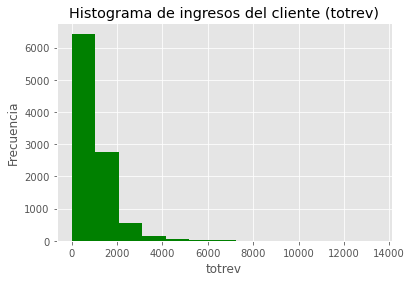

In [21]:
plt.style.use('ggplot')
plt.hist(df3["totrev"],bins=13,color="green")
plt.title('Histograma de ingresos del cliente (totrev)')
plt.xlabel("totrev");plt.ylabel("Frecuencia")
plt.show()

#### Boxplot

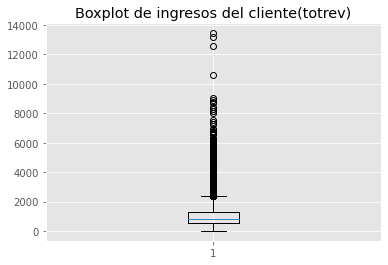

In [22]:
plt.style.use('ggplot')
plt.boxplot(df3["totrev"])
plt.title('Boxplot de ingresos del cliente(totrev)')
plt.show()

#### Gráficas a partir de `groupby`

In [23]:
df4=round(df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean(),2)

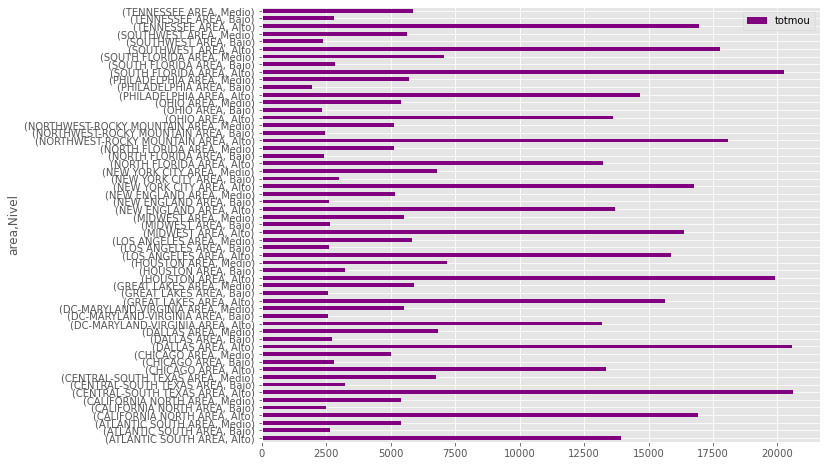

In [24]:
df4.plot(kind='barh',figsize=(10,8),color='purple')
plt.show()

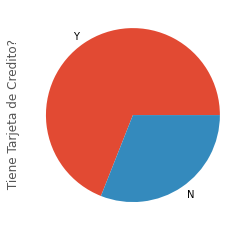

In [25]:
df3["creditcd_x"].value_counts().plot(kind="pie", label =' Tiene Tarjeta de Credito?')
plt.show()

*Revisando la relación entre las dos variables `totrev` y `totmou`*

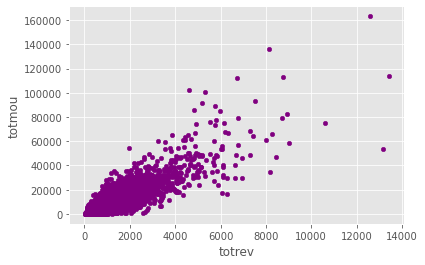

In [26]:
df3.plot(kind="scatter",x='totrev',y='totmou',c='purple')

### `Seaborn`

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


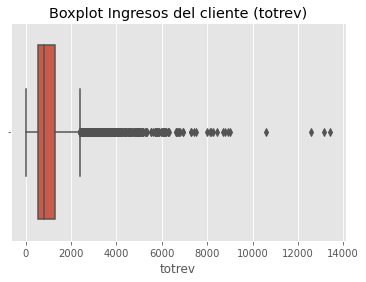

In [27]:
import seaborn as sns
sns.boxplot(df3["totrev"],orient='v')
plt.title('Boxplot Ingresos del cliente (totrev)')
plt.show()

### Gráficas de parcela 

<Figure size 8352x288 with 0 Axes>

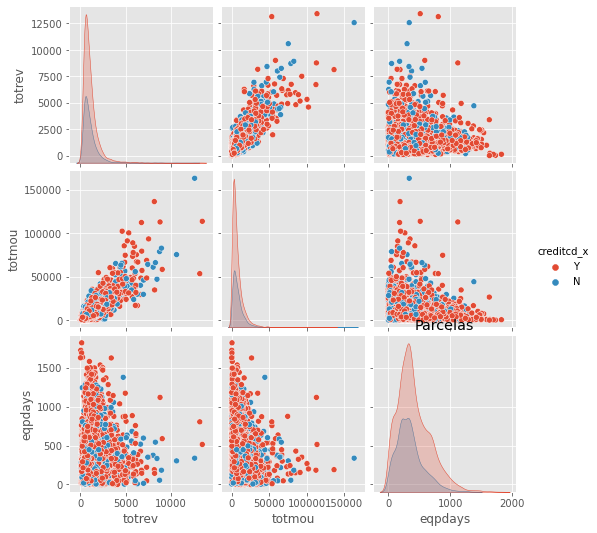

In [28]:
plt.figure(figsize=(116,4))
sns.pairplot(data=df3, hue='creditcd_x', vars=['totrev','totmou','eqpdays'])
plt.title("Parcelas")
plt.show()

### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel_totrev

In [29]:
df_con_etiquetas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 1069232 to 1061746
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   totmou         9997 non-null   float64
 1   totrev         9997 non-null   float64
 2   creditcd_x     9845 non-null   object 
 3   eqpdays        9997 non-null   int64  
 4   custcare_Mean  9997 non-null   float64
 5   new_cell       9997 non-null   object 
 6   area           9997 non-null   object 
 7   creditcd_y     9845 non-null   object 
 8   Nivel          9997 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 781.0+ KB


In [30]:
df5=round(df_con_etiquetas.groupby(['creditcd_x','Nivel'])[['totmou']].sum(),2)
df5

totmou
creditcd_x Nivel             
N          Alto   12871296.03
           Bajo    2395403.00
           Medio  10014790.00
Y          Alto   27425818.52
           Bajo    4179031.00
           Medio  18902288.16

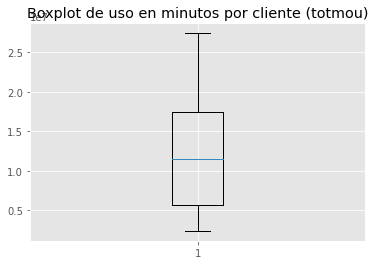

In [31]:
plt.style.use('ggplot')
plt.boxplot(df5["totmou"])
plt.title('Boxplot de uso en minutos por cliente (totmou)')
plt.show()

In [58]:
df6=df_con_etiquetas[['creditcd_x','Nivel','totmou']]
df6['Etiqueta']=df6["creditcd_x"].str.cat(df6[["Nivel"]].astype(str), sep="_")

<ipython-input-58-4a31154e7466>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Etiqueta']=df6["creditcd_x"].str.cat(df6[["Nivel"]].astype(str), sep="_")


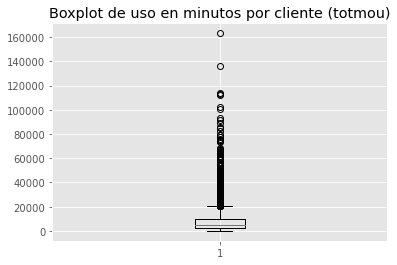

In [64]:
df7=df6[['Etiqueta','totmou']]

plt.style.use('ggplot')
plt.boxplot(df7["totmou"])
plt.title('Boxplot de uso en minutos por cliente (totmou)')
plt.show()